In [3]:
import wget

In [5]:
wget.download('https://people.na.infn.it/~totem/Eventi/Muoni_Orario_2021_06_11.txt', out = 'data')

'data'

In [7]:
import pandas as pd

In [46]:
help(pd.read_table)

Help on function read_table in module pandas.io.parsers.readers:

read_table(filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]', *, sep: 'str | None | lib.NoDefault' = <no_default>, delimiter: 'str | None | lib.NoDefault' = None, header: "int | Sequence[int] | None | Literal['infer']" = 'infer', names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>, index_col: 'IndexLabel | Literal[False] | None' = None, usecols: 'UsecolsArgType' = None, dtype: 'DtypeArg | None' = None, engine: 'CSVEngine | None' = None, converters: 'Mapping[Hashable, Callable] | None' = None, true_values: 'list | None' = None, false_values: 'list | None' = None, skipinitialspace: 'bool' = False, skiprows: 'list[int] | int | Callable[[Hashable], bool] | None' = None, skipfooter: 'int' = 0, nrows: 'int | None' = None, na_values: 'Sequence[str] | Mapping[str, Sequence[str]] | None' = None, keep_default_na: 'bool' = True, na_filter: 'bool' = True, verbose: 'bool | lib.NoDefault' = <no_d

In [75]:
df = pd.read_table('data', sep = r'\s+', names = ['event_id','time','theta_x','theta_y'])
theta_x = df.theta_x
theta_y = df.theta_y
df

,event_id,time,theta_x,theta_y
0,ST07B5,00:00:17,18.43,4.62
1,ST07B6,00:00:34,9.99,21.70
2,ST07B7,00:01:11,18.61,-6.22
3,ST07B8,00:01:37,-7.85,10.40
4,ST07B9,00:02:42,12.30,24.26
...,...,...,...,...
2476,ST1162,23:57:53,12.00,5.72
2477,ST1163,23:58:07,-10.17,-4.31
2478,ST1164,23:58:27,-10.26,2.53
2479,ST1165,23:59:21,-22.97,-5.27


In [60]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

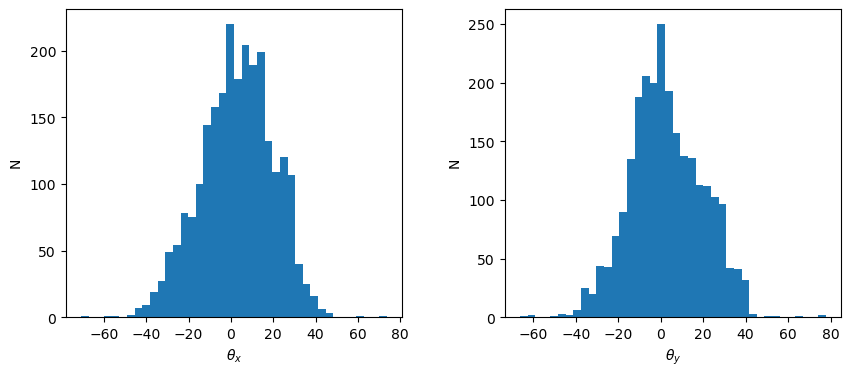

In [117]:
fig = plt.figure(figsize = (10, 4), dpi=100)
gs = gridspec.GridSpec(1, 9)
ax0 = fig.add_subplot(gs[:, :4])
ax1 = fig.add_subplot(gs[:, 5:])
nbins = 40
data_x, bins_x, p_x = ax0.hist(theta_x, nbins)
ax0.set_xlabel(r'$\theta_x$')
ax0.set_ylabel(r'$\mathrm{N}$')
data_y, bins_y, p_y = ax1.hist(theta_y, nbins)
ax1.set_xlabel(r'$\theta_y$')
ax1.set_ylabel(r'$\mathrm{N}$')
plt.show()

In [81]:
import numpy as np

In [83]:
valid_x = theta_x[theta_x != np.nan]
valid_y = theta_y[theta_y != np.nan]
valid_x.size, valid_y.size

(2481, 2481)

In [107]:
mx = np.tan(np.radians(valid_x))
my = np.tan(np.radians(valid_y))
theta = np.arccos(1/np.sqrt(mx**2+my**2+1))
phi = np.arctan2(my, mx)

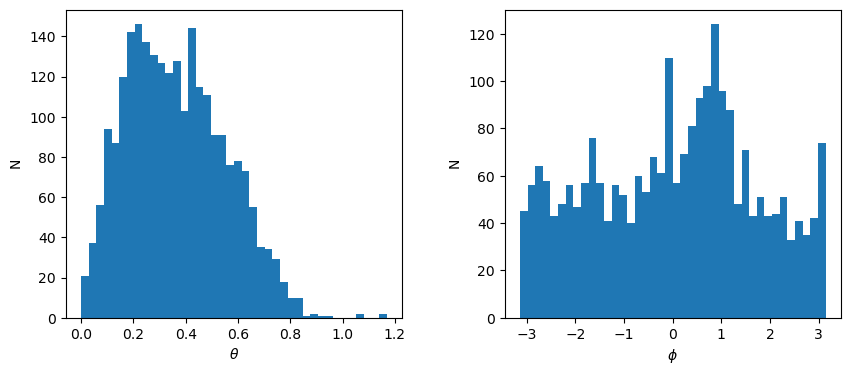

In [133]:
fig = plt.figure(figsize = (10, 4), dpi=100)
gs = gridspec.GridSpec(1, 9)
ax0 = fig.add_subplot(gs[:, :4])
ax1 = fig.add_subplot(gs[:, 5:])
nbins = 40
data_t, bins_t, p_t = ax0.hist(theta, nbins)
ax0.set_xlabel(r'$\theta$')
ax0.set_ylabel(r'$\mathrm{N}$')
data_p, bins_p, p_p = ax1.hist(phi, nbins)
ax1.set_xlabel(r'$\phi$')
ax1.set_ylabel(r'$\mathrm{N}$')
plt.show()